<a href="https://colab.research.google.com/github/AnSaradar/Music_Genre_Classificatioin/blob/main/MusicGenreClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [9]:
!pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.0 MB/s eta 0:00:00


In [10]:
!pip install pycaret
from pycaret.classification import *
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 64.9 MB/s eta 0:

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error , r2_score , make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
import requests
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score ,KFold
from sklearn.metrics import make_scorer, mean_squared_error
from math import sqrt
from sklearn.svm import SVR
import sklearn.metrics
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,ExtraTreesClassifier ,GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

#Loading & Discovering The Data

In [105]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/MusicGenreClassification/train (1).csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/MusicGenreClassification/test (2).csv')

In [106]:
train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [108]:
train.columns

Index(['Id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [109]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [110]:
len(train['Class'].unique())

11

In [111]:
train.isnull().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [112]:
train.shape

(14396, 18)

#Data Visualization & Analysis

## Histogram

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_in min/ms'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'Class'}>]], dtype=object)

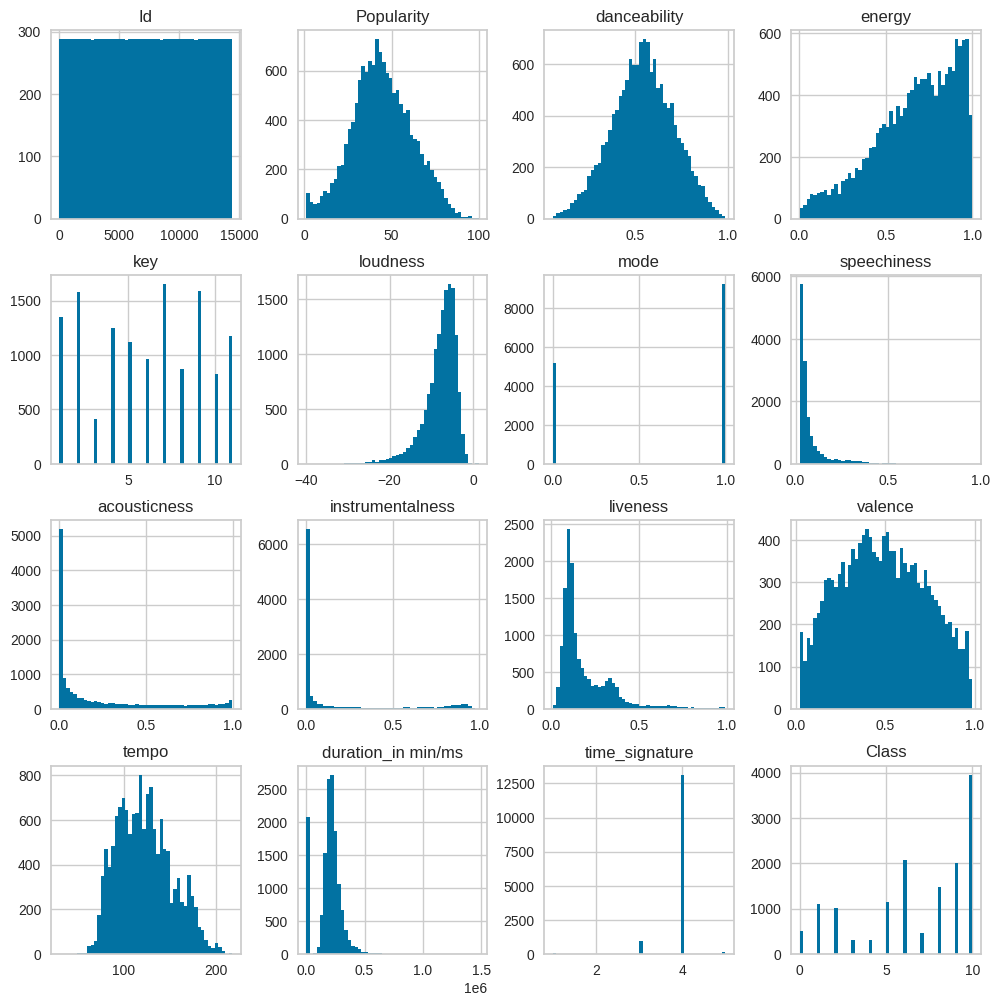

In [ ]:
train.hist(bins=50, figsize=(12, 12))

From this Histogram we can get many insights .


## Box Plot

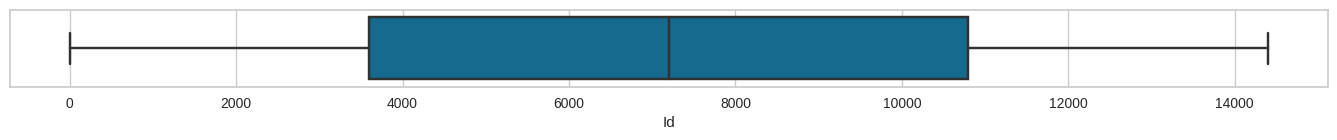

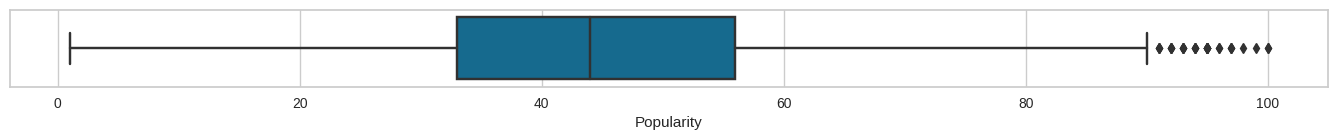

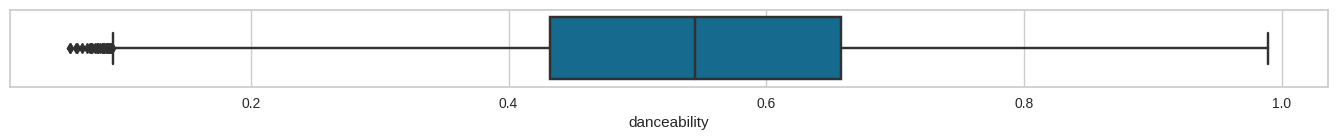

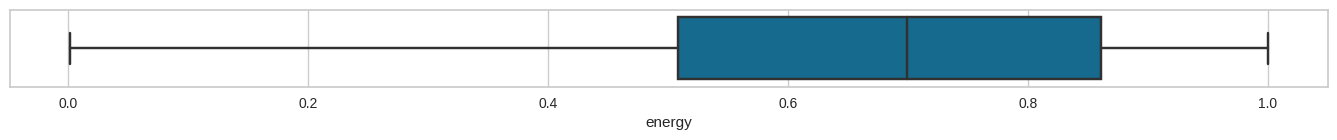

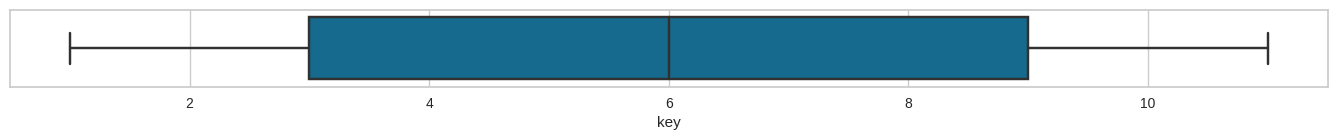

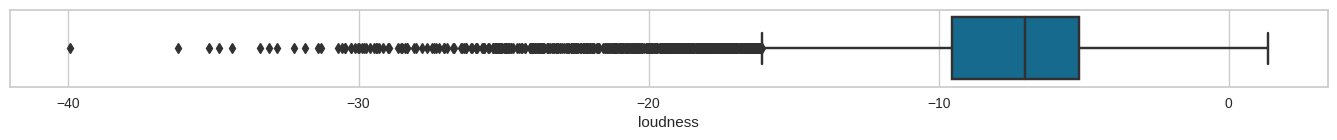

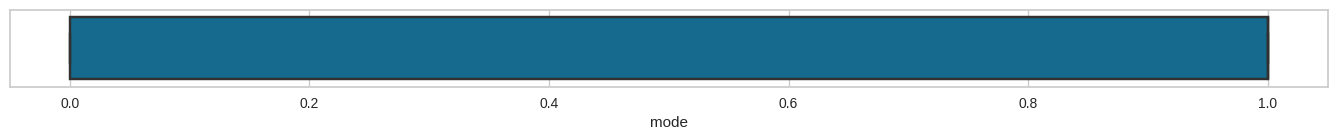

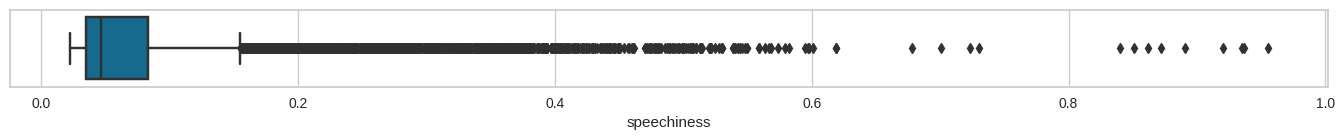

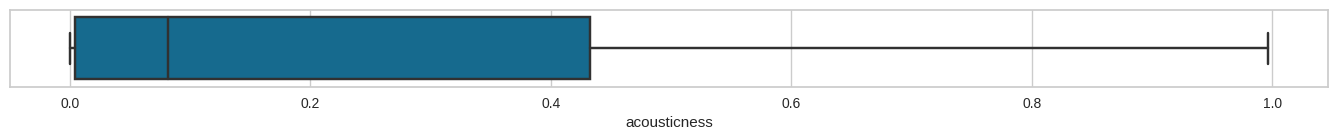

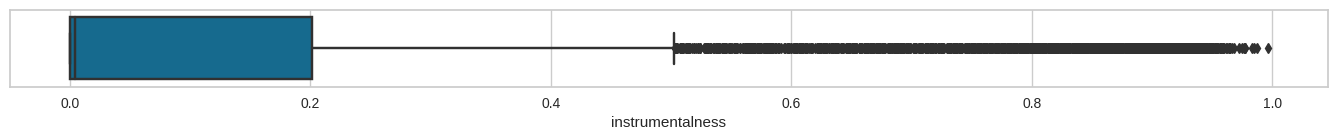

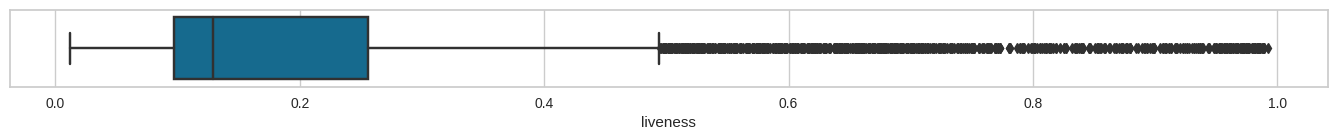

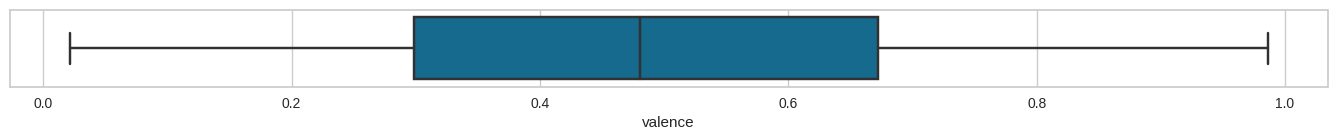

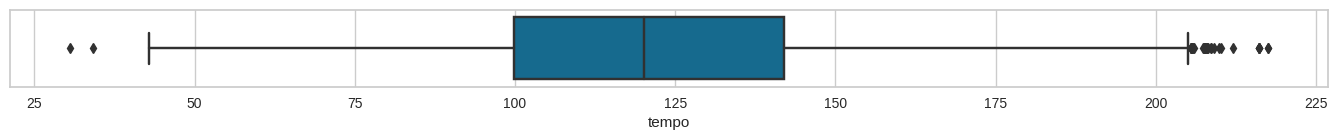

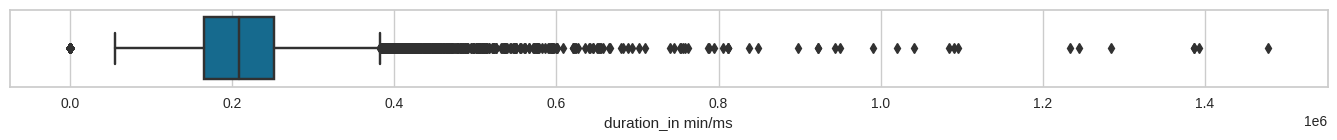

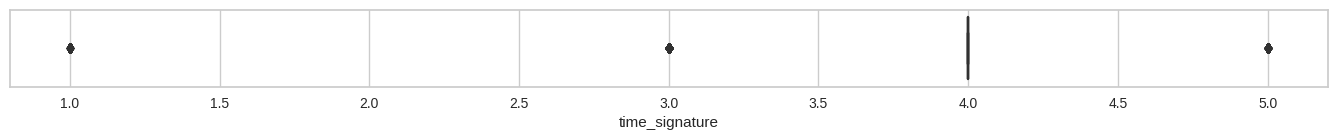

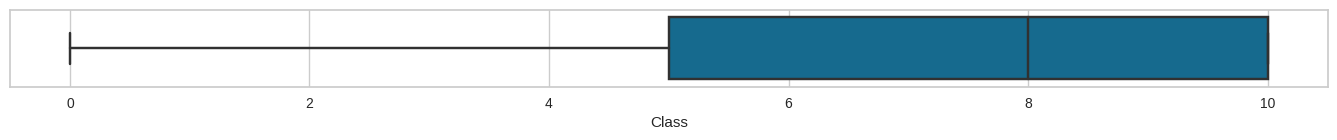

In [ ]:
num_columns = train.drop(['Artist Name','Track Name'],axis=1)
for column in num_columns:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=num_columns, x=column)

##Heat Map

<function matplotlib.pyplot.show(close=None, block=None)>

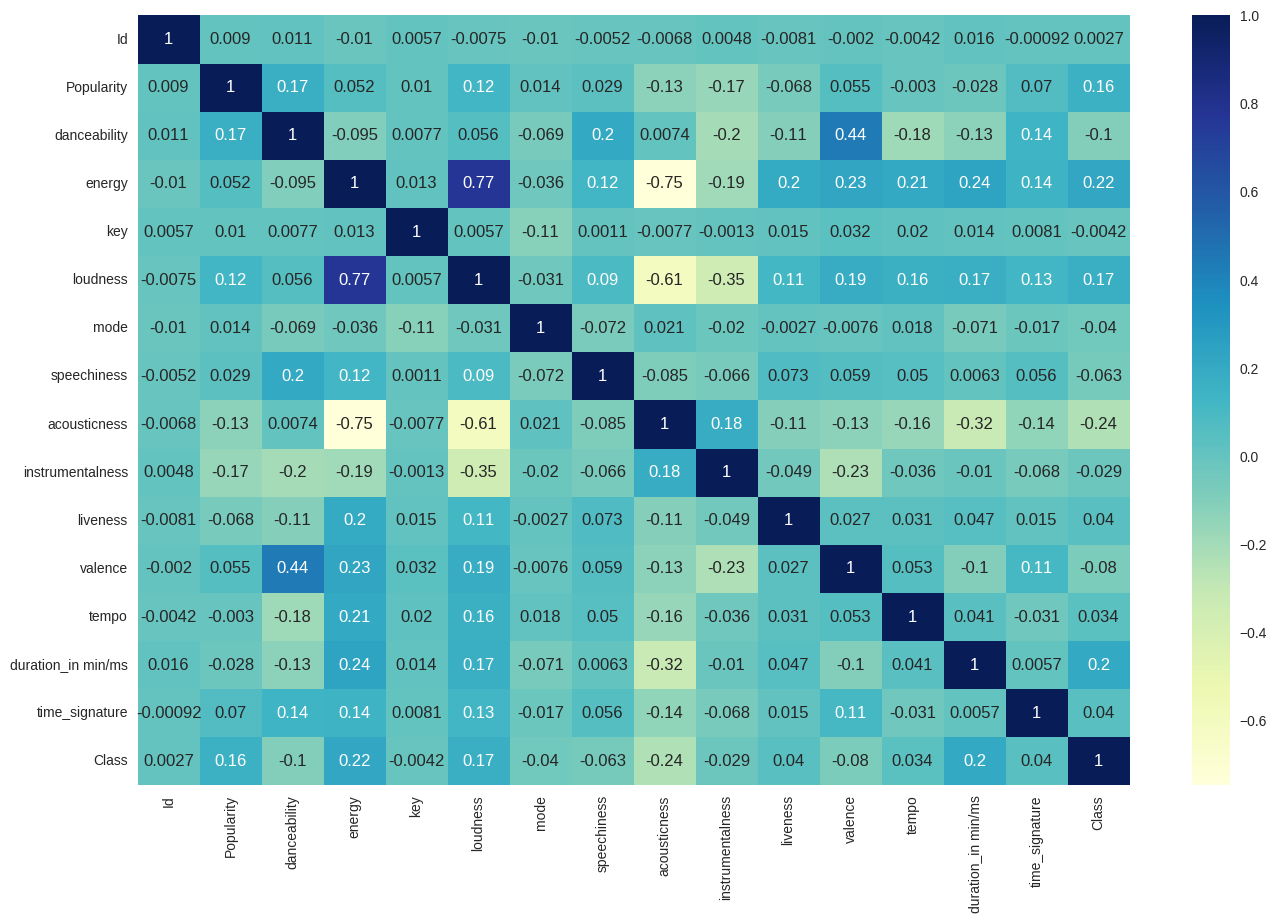

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(data=train.corr(),cmap="YlGnBu",annot = True)
plt.show

##Genre Distribution

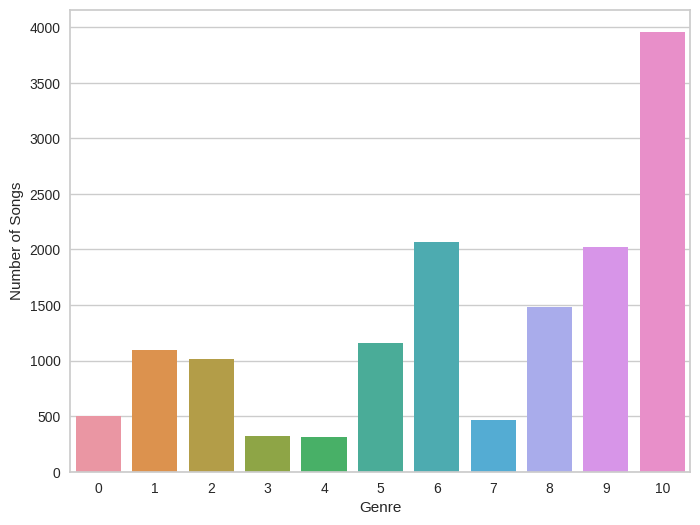

In [ ]:
plt.figure(figsize=(8, 6))

# Plot count plot
sns.countplot(data=train,x = 'Class')

# Add labels
plt.xlabel("Genre")
plt.ylabel("Number of Songs")

# Display the plot
plt.show()

##Artist Ranking "by the number of songs"

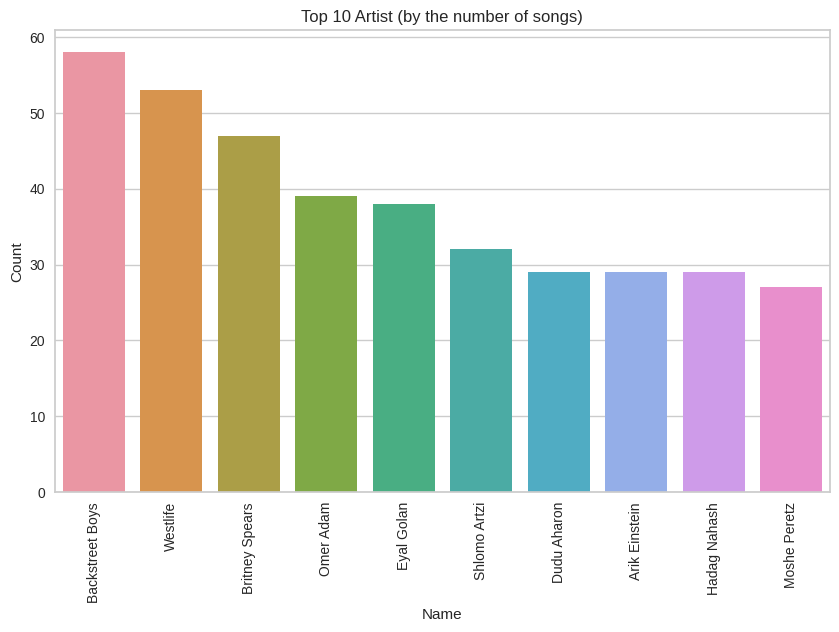

In [ ]:
name_counts = train['Artist Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))

sns.barplot(x=name_counts.index, y=name_counts.values)

plt.xlabel("Name")
plt.ylabel("Count")
plt.title("Top 10 Artist (by the number of songs)")

plt.xticks(rotation=90)

plt.show()

##Artist Ranking "by popularity"

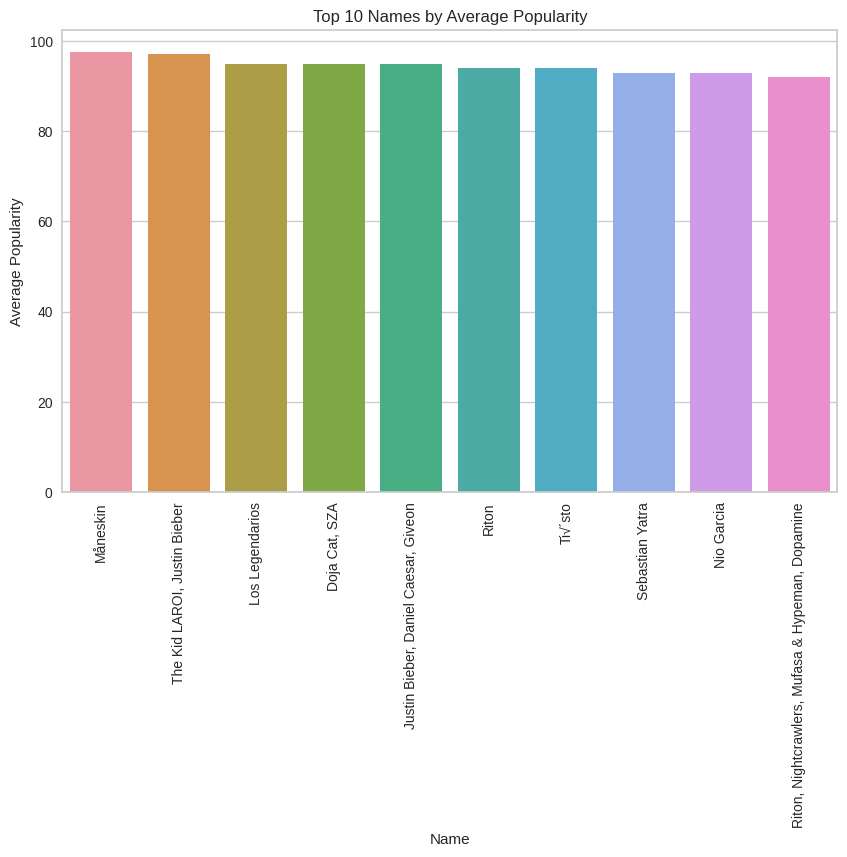

In [ ]:
avg_popularity = train.groupby('Artist Name')['Popularity'].mean().sort_values(ascending=False).head(10)

# Configure figure size
plt.figure(figsize=(10, 6))

# Plot bar plot
sns.barplot(x=avg_popularity.index, y=avg_popularity.values)

# Customize labels and title
plt.xlabel("Name")
plt.ylabel("Average Popularity")
plt.title("Top 10 Names by Average Popularity")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Outliers Distribution

In [ ]:
def count_outliers(df):
    outliers = pd.DataFrame(columns=df.columns)

    for column in df.columns:
        data = df[column]

        # Calculate the quartiles
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Find the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the outliers
        num_outliers = ((data < lower_bound) | (data > upper_bound)).sum()

        # Add the count to the outliers DataFrame
        outliers[column] = [num_outliers]

    return outliers

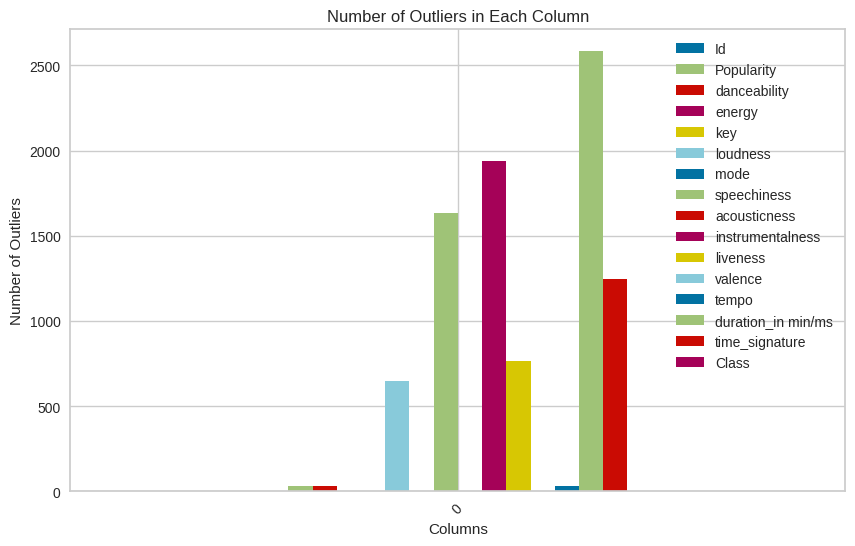

In [ ]:
outliers_count = count_outliers(num_columns)

# Plot the counts of outliers as a bar plot
outliers_count.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers in Each Column')
plt.xticks(rotation=45)
plt.show()

#Preprocessing

##Handling Duplicates

In [113]:
train.shape

(14396, 18)

In [114]:
columns_to_check = ['Artist Name', 'Track Name']
train.drop_duplicates(subset=columns_to_check, keep='first', inplace=True)
train.shape

(13176, 18)

##Preprocessing functions"

In [95]:
def apply_flooring_capping(df):
    for column in df.select_dtypes(include='number'):
        # Calculate the 5th percentile
        percentile_5 = df[column].quantile(0.05)

        # Calculate the 90th percentile
        percentile_90 = df[column].quantile(0.90)

        # Apply flooring and capping
        df[column] = df[column].clip(percentile_5, percentile_90)

    return df

In [96]:
def convert_numerical_to_categorical(df):

  df['key'] = df['key'].astype("category")
  df['mode'] = df['mode'].astype("category")
  df['time_signature'] = df['time_signature'].astype("category")

  return df


In [97]:
def apply_binning(df):

  df['valence'] = df['valence'].apply(lambda x: 'happy' if x > 0.4 else 'sad')
  df['liveness'] = df['liveness'].apply(lambda x: 'live' if x > 0.8 else 'recorded')
  df['instrumentalness'] = df['instrumentalness'].apply(lambda x: 'instrumental' if x > 0.5 else 'non instrumental')
  df['speechiness'] = df['speechiness'].apply(lambda x: 'Speech' if x > 0.66 else ('Mid Speech' if x > 0.33 else 'Non Speech'))

  return df


In [98]:
def handling_skewed_data(df):
  df['duration_in min/ms'] = np.sqrt(df['duration_in min/ms'])
  df['loudness'] = np.cbrt(df['loudness'])
  df['speechiness'] = df['speechiness'].apply(lambda x: 1 / x)
  df['instrumentalness'] = np.log(df['instrumentalness'])
  df['liveness'] = np.log(df['liveness'])
  df['acousticness'] = np.cbrt(df['acousticness'])
  df['tempo'] = np.cbrt(df['tempo'])
  return df

In [99]:
def drop_outliers(df):

  df = df.drop(df[(df['duration_in min/ms'] > 7)  | (df['duration_in min/ms'] < 1)].index)
  df = df.drop(df[(df['loudness']<=-30)].index)
  df = df.drop(df[(df['tempo']>=206) |(df['tempo']<40) ].index)

  return df

In [100]:
def handling_duration_column(df):

  condition = df['duration_in min/ms'] < 30
  df.loc[condition,'duration_in min/ms'] = df.loc[condition,'duration_in min/ms']*60000
  df['duration_in min/ms'] = df['duration_in min/ms']/60000
  return df

In [115]:
def preprocessing(df,train=True):

  df = handling_duration_column(df)
  df = convert_numerical_to_categorical(df)
  if train:
    df = drop_outliers(df)

  #df = apply_binning(df)
  df = handling_skewed_data(df)

  df.drop(['Id','energy','Track Name','tempo','time_signature','duration_in min/ms','valence'],axis=1,inplace=True)


  return df

In [116]:
train = preprocessing(train)
train.shape

(12731, 11)

array([[<Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

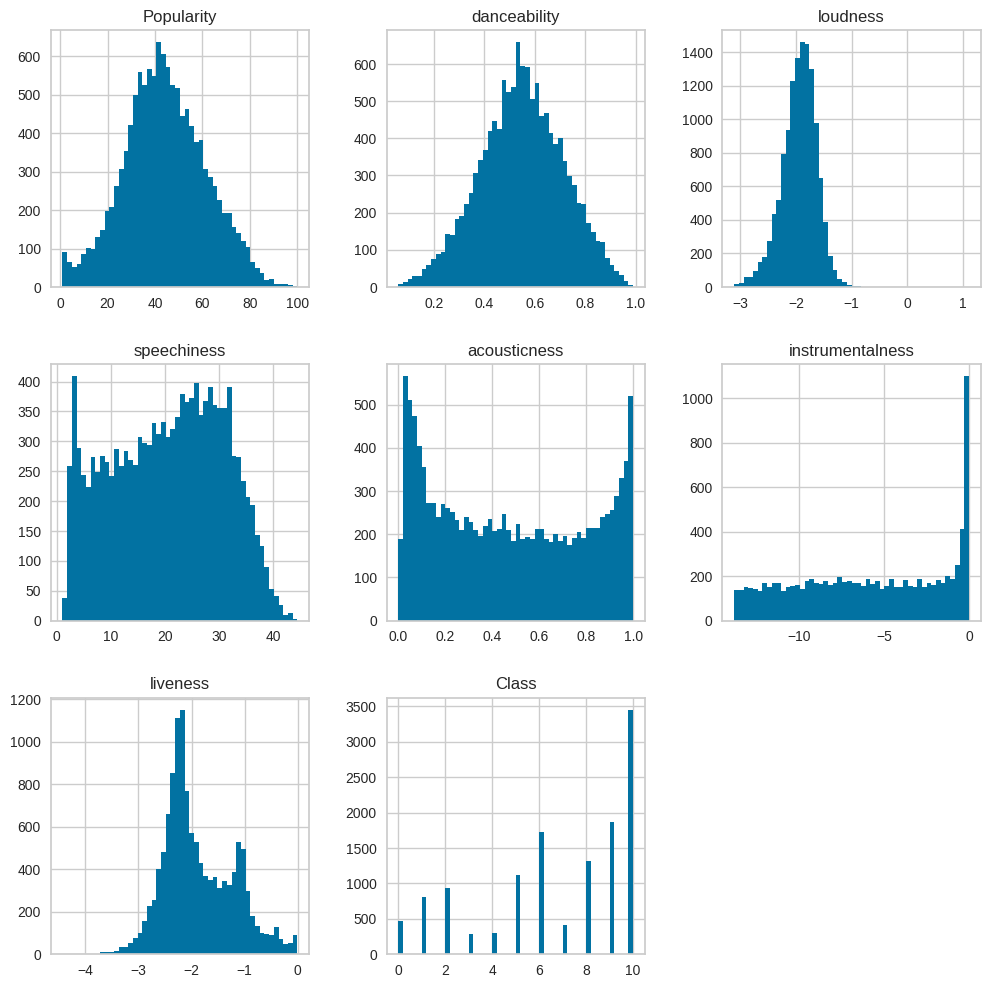

In [117]:
train.hist(bins=50, figsize=(12, 12))

In [118]:
train.drop_duplicates(subset = train.columns.difference(['class']), inplace = True, ignore_index = True)
train.shape


(12712, 11)

## Converting the Target Column

In [119]:
train['Class'] = train['Class'].astype("category")

##Data Selection

In [61]:
X = train.drop(['Class'],axis=1).copy()
y = train['Class'].copy()

In [62]:
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = X.select_dtypes(['object' ,'category']).columns.tolist()


In [63]:
numerical_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler()
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown = 'ignore')
)

# Create the ColumnTransformer
preprocessor = make_column_transformer(
    (numerical_transformer, numerical_columns),
    (categorical_transformer, categorical_columns)
)

In [64]:
X_transformed = preprocessor.fit_transform(X)

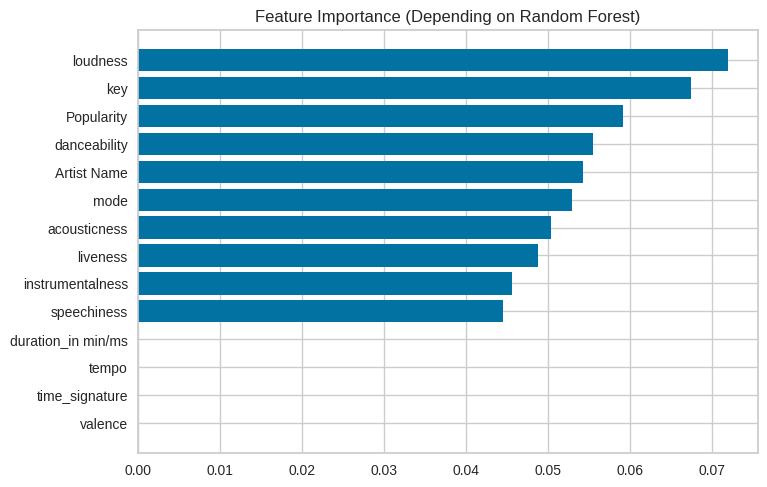

In [65]:
rf = RandomForestClassifier()
features = X.columns
rf.fit(X_transformed, y)

f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.title("Feature Importance (Depending on Random Forest)")
plt.show()

# Data Transformation & Pipeline

##Splitting & Pipeline Creating

In [120]:
X = train.drop(['Class'],axis=1).copy()
y = train['Class'].copy()

In [121]:
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = X.select_dtypes(['object' ,'category']).columns.tolist()

In [122]:
numerical_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler()
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown = 'ignore')
)

# Create the ColumnTransformer
preprocessor = make_column_transformer(
    (numerical_transformer, numerical_columns),
    (categorical_transformer, categorical_columns)
)

In [123]:
X_transformed = preprocessor.fit_transform(X)

##Oversampling

In [124]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_transformed, y)

##Undersampling

In [58]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming your features are stored in X and the target variable in y
under_sampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = under_sampler.fit_resample(X_transformed, y)

##Train_Test Split

In [125]:
X_train, X_valid, y_train, y_valid = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state=42)

In [126]:
X_train.shape

(30316, 7697)

#Model Training


###Logistic Regression

In [127]:
log_reg =  LogisticRegression(class_weight="balanced",multi_class="multinomial")

log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_valid)

f1 = f1_score(y_valid, y_pred, average="weighted")

print(f"f1: {f1}")

f1: 0.8435845260829714


### Decision Tree

In [128]:

dt =  DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred = dt.predict(X_valid)

f1 = f1_score(y_valid, y_pred, average="weighted")

print(f"f1: {f1}")


f1: 0.7058144226353722


## Random Forest

In [129]:
rf =  RandomForestClassifier(random_state = 2022, verbose=1)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_valid)

f1 = f1_score(y_valid, y_pred, average="weighted")

print(f"f1: {f1}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   25.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


f1: 0.9009491325144086


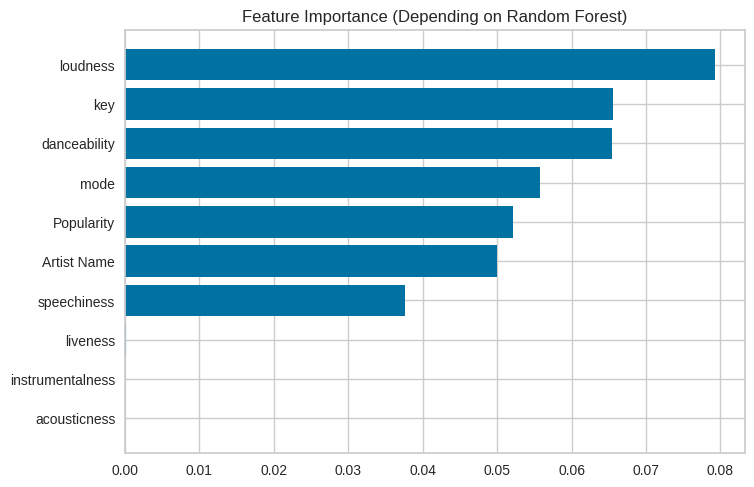

In [130]:
features = X.columns
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.title("Feature Importance (Depending on Random Forest)")
plt.show()

##MLP

In [131]:
mlp = MLPClassifier()

mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9299379865417601


## Gradient Boosting

In [132]:
model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,

                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

model.fit(X_train,y_train)

y_pred = model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6967937722654703


## CatBoost

In [133]:
import catboost
from catboost import CatBoostClassifier

In [134]:
catboost_pool = catboost.Pool(X_train, y_train)
cat_boost = CatBoostClassifier(task_type="GPU", devices='0',verbose=False)  # Replace '0' with the index of your GPU device


In [135]:
cat_boost.fit(catboost_pool)

In [136]:
y_pred = cat_boost.predict(X_valid)

f1 = f1_score(y_valid, y_pred, average="weighted")

print(f"f1: {f1}")

f1: 0.6891631192878597


#Testing

In [143]:
test1  = test.copy()
Id=test1['Id']

test1 = preprocessing(test1,train=False)


In [144]:
Id.shape

(3600,)

In [145]:
test1 = preprocessor.transform(test1)


pred = rf.predict(test1)
pred = np.squeeze(pred)
final={'Id': Id, 'Class':pred }

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


In [146]:
pred.shape

(3600,)

In [147]:
df1 = pd.DataFrame(data = final)

In [148]:
df1.to_csv('new.csv',index=False)